In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df_red = pd.read_csv('winequality-red.csv',sep=';')

In [12]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df_red['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [23]:
column_name = 'quality_score'
df_red.loc[(df_red['quality'] > 1)  & (df_red['quality'] <= 3), 'quality_score'] = 'Bad'
df_red.loc[(df_red['quality'] > 3)  & (df_red['quality'] <= 7), 'quality_score'] = 'Medium'
df_red.loc[(df_red['quality'] > 7)  & (df_red['quality'] <= 10), 'quality_score'] = 'Good'

In [24]:
df_red['quality_score'].value_counts()

Medium    1571
Good        18
Bad         10
Name: quality_score, dtype: int64

In [25]:
y = df_red.quality_score
X = df_red.drop('quality_score',axis = 1)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

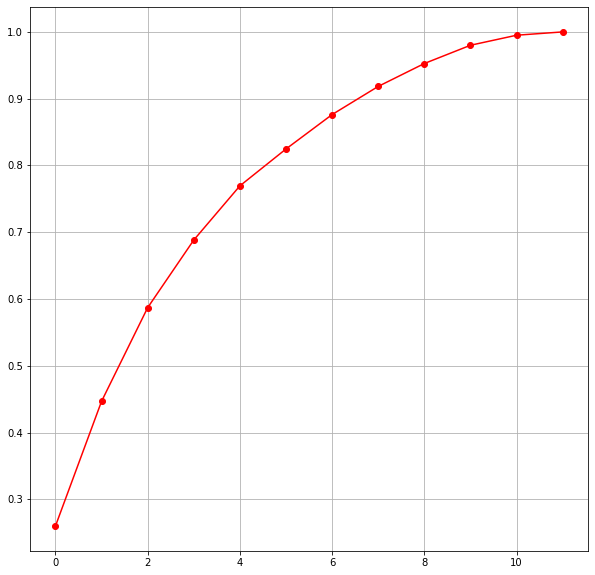

In [28]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [29]:
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [53]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[  1   0   1]
 [  0   5   1]
 [  0   0 312]]
99.375


Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [55]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  1   0   1]
 [  0   3   3]
 [  3   0 309]]
97.8125


Naive Bayes 

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [57]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[  1   0   1]
 [  0   3   3]
 [  0   0 312]]
98.75


Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [59]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  1   0   1]
 [  0   2   4]
 [  0   0 312]]
98.4375


SVC Model

In [60]:
from sklearn.svm import SVC
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()
lin_svc.fit(X_train, y_train)
lin_svc=rf.predict(X_test)

In [61]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[  1   0   1]
 [  0   2   4]
 [  0   0 312]]
98.4375


In [62]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(X_train, y_train)
rbf_svc=rf.predict(X_test)

In [63]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[  1   0   1]
 [  0   2   4]
 [  0   0 312]]
98.4375
